Визуальный анализ данных 
с помощью Python(numpy, pandas, matplotlib, seaborn).



Мировые продажи электромобилей: 2010-2024.

Данные https://www.kaggle.com/datasets/patricklford/global-ev-sales-2010-2024


Глобальные данные по электромобилям: 2010-2024 гг., с некоторыми прогнозами на 2025-2035 гг. (Китай, Северная Америка, другие (сгруппированные регионы) и мир).

In [14]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
evcar_df = pd.read_csv("IEA Global EV Data 2024.csv")

Будем анализировать только реальные данные 

In [16]:
evcar_data = evcar_df[evcar_df["category"] == 'Historical']
evcar_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9174 entries, 0 to 12377
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      9174 non-null   object 
 1   category    9174 non-null   object 
 2   parameter   9174 non-null   object 
 3   mode        9174 non-null   object 
 4   powertrain  9174 non-null   object 
 5   year        9174 non-null   int64  
 6   unit        9174 non-null   object 
 7   value       9174 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 645.0+ KB


В данных нет пропусков

<Axes: xlabel='count', ylabel='region'>

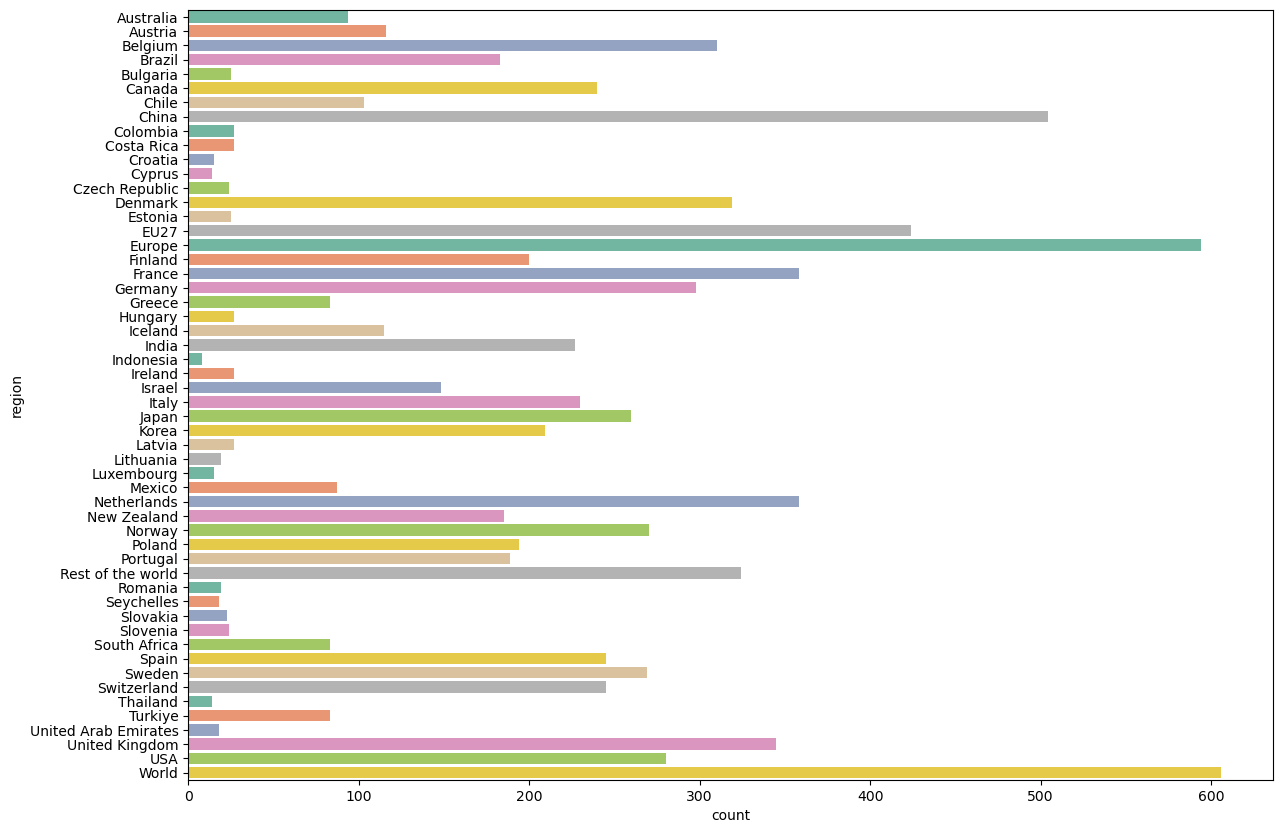

In [30]:
plt.figure(figsize=(14, 10)) 
sns.countplot(data=evcar_data , y='region', palette='Set2', legend=False, hue='region')  


График показывает количество вхождений каждого уникального значения из столбца 'region'

.

Рассмотрим на количество продаж и запасов электротранспорта 

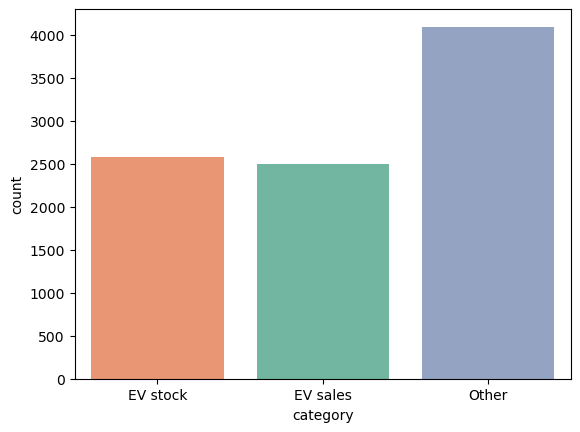

In [31]:
ev_stock = evcar_data[evcar_data["parameter"] == "EV stock"].shape[0]
ev_sales= evcar_data[evcar_data["parameter"] == "EV sales"].shape[0]
ev_p_other = evcar_data[~evcar_data["parameter"].isin(["EV stock", "EV sales"])].shape[0]
s_df = pd.DataFrame({
    "category": ["EV stock", "EV sales", "Other"],
    "count": [ev_stock, ev_sales, ev_p_other]
})

sns.barplot(x='category', y='count', data=s_df, palette='Set2', legend=False, hue='count')

plt.show()



Видим, что количество продаж приближается к количеству запасов.

.

Рассмотрим доли типов электротранспорта


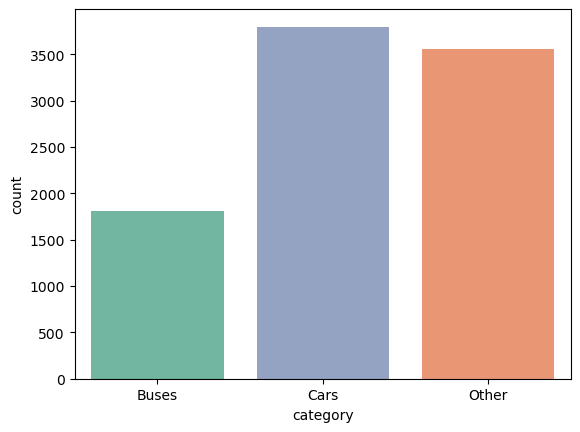

In [32]:
ev_bus = evcar_data[evcar_data["mode"] == "Buses"].shape[0]
ev_car= evcar_data[evcar_data["mode"] == "Cars"].shape[0]
ev_m_other = evcar_data[~evcar_data["mode"].isin(["Buses", "Cars"])].shape[0]

s_df = pd.DataFrame({
    "category": ["Buses", "Cars", "Other"],
    "count": [ev_bus, ev_car, ev_m_other]
})

sns.barplot(x='category', y='count', data=s_df, palette='Set2',legend=False, hue='count' )
plt.show()


Видим, что электроавтомобили в два раза популярнее, чем электроавтобусы

.

Рассмотрим различные доли электротранспорта


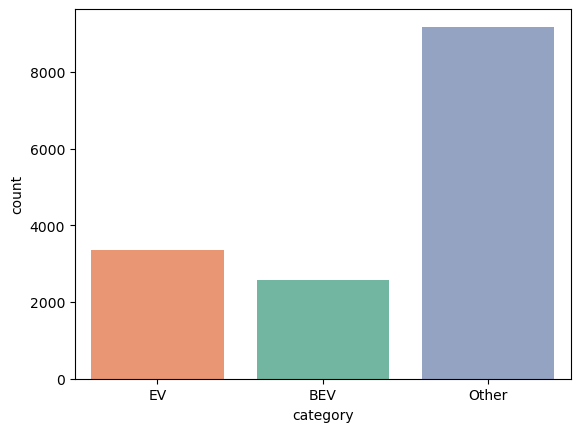

In [34]:
ev_ev = evcar_data[evcar_data["powertrain"] == "EV"].shape[0]
ev_bev= evcar_data[evcar_data["powertrain"] == "BEV"].shape[0]
ev_pt_other = evcar_data[~evcar_data["powertrain"].isin(["Buses", "Cars"])].shape[0]

s_df = pd.DataFrame({
    "category": ["EV", "BEV", "Other"],
    "count": [ev_ev, ev_bev, ev_pt_other]
})

sns.barplot(x='category', y='count', data=s_df, palette='Set2', legend=False, hue='count')

plt.show()


BEV — это аббревиатура от "Battery Electric Vehicle", что переводится как "электромобиль с аккумуляторной батареей". Этот тип транспортных средств полностью зависит от аккумуляторной батареи для получения энергии.


EV — это более широкий термин, который охватывает все типы транспортных средств, использующих электричество в качестве основного или частичного источника энергии. 


Видим, что EV немного опережает BEV


.

Рассмотрим года по количеству продаж

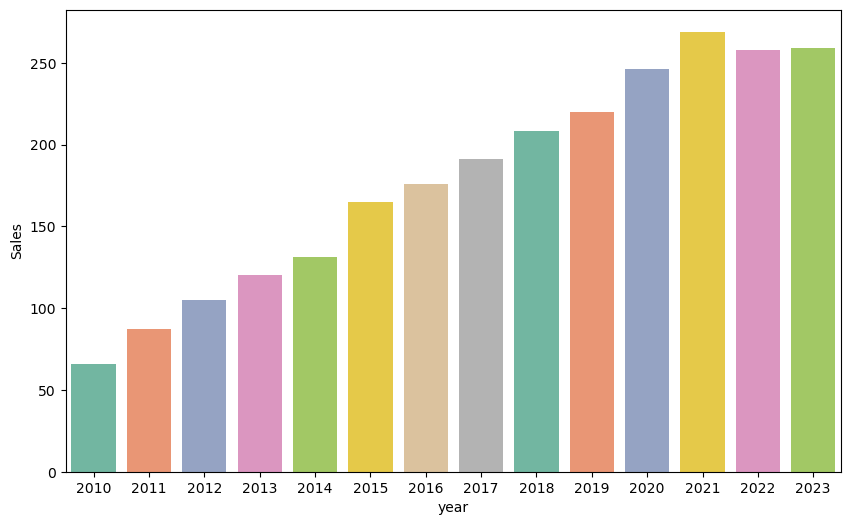

In [36]:
ev_sales_data = evcar_data[evcar_data["parameter"] == 'EV sales']
ev_year_count = ev_sales_data['year'].value_counts().reset_index()
ev_year_count.columns = ['year', 'count']
ev_dt = pd.DataFrame({
    'year': ev_year_count['year'],
    'count': ev_year_count['count']
})
plt.figure(figsize=(10, 6)) 
sns.barplot(x='year', y='count', data=ev_dt, palette='Set2', legend=False, hue='count')
plt.ylabel('Sales')
plt.show()

Рассмотрим столбец 'region', выберем только страны и выведем количество продаж электромобилей по регионам

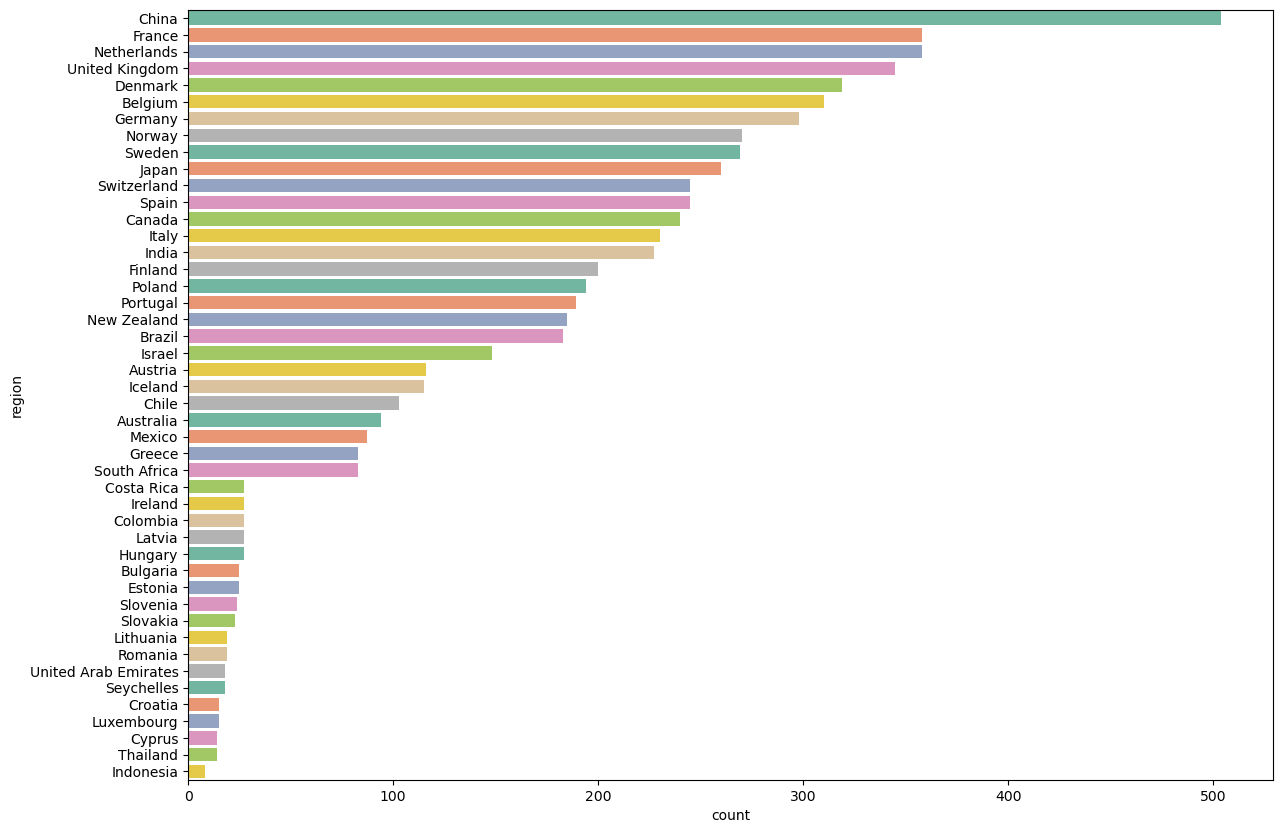

In [37]:
import pycountry

regions = evcar_data['region'].unique()

countries = (pycountry.countries)
country_names = [country.name for country in countries]
filtered_regions = [region for region in regions if region in country_names]

filtered_evcar_data = evcar_data[evcar_data['region'].isin(filtered_regions)]
region_sales = filtered_evcar_data['region'].value_counts().reset_index()
region_sales.columns = ['region', 'count']

plt.figure(figsize=(14, 10))
sns.barplot(data=region_sales, y='region', x='count', palette="Set2", legend=False, hue='region')
plt.show()




Динамика продаж электроавтомобилей в топ-5 странах по годам

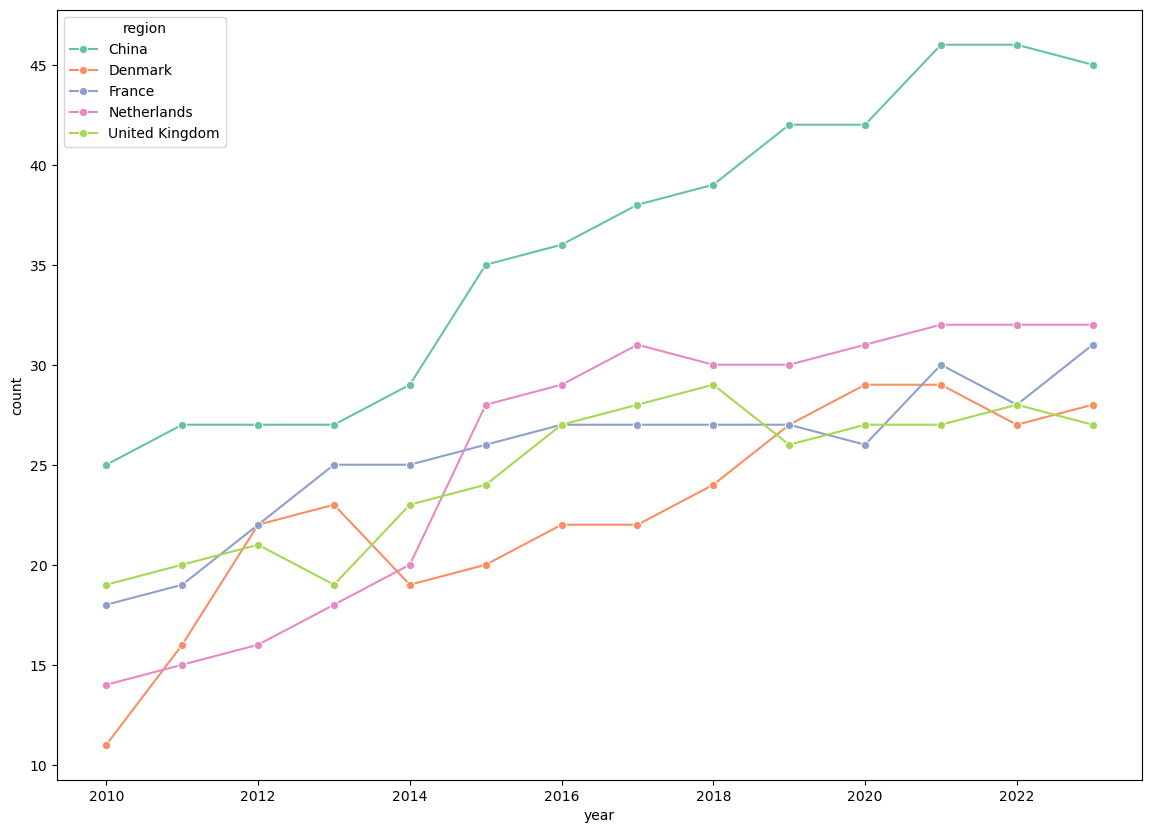

In [40]:

top_5_regions = region_sales.head(5)
top_5_regions_list = top_5_regions['region'].tolist()
top_5_sales_data = filtered_evcar_data[filtered_evcar_data['region'].isin(top_5_regions_list)]
top_5_sales_year = top_5_sales_data.groupby(['year', 'region']).size().reset_index(name='count')

plt.figure(figsize=(14, 10))
sns.lineplot(data=top_5_sales_year, x='year', y='count', hue='region', marker='o', palette="Set2")
plt.show()